dependencies

In [ ]:
%pip install datasets
%pip install pandas
%pip install seaborn
%pip install maplotlib
%pip install great-expectations
%pip install pprintpp

load dataset

In [3]:
from datasets import load_dataset
import pandas as pd

#load dataset (KAGGLE CHURN)
dataset = load_dataset("kodylow/kaggle_churn", split="train", streaming= True)

#shuffle with a buffer large enough to cover a good chunk of the data
shuffled_dataset = dataset.shuffle(seed=42, buffer_size=10000)

Repo card metadata block was not found. Setting CardData to empty.


In [4]:
#convert to pandas. 
small_sample = list(shuffled_dataset.take(10000))
df = pd.DataFrame(small_sample)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    10000 non-null  object 
 1   is_churn                10000 non-null  int64  
 2   playtime_per_day        10000 non-null  float64
 3   city                    10000 non-null  int64  
 4   bd                      10000 non-null  int64  
 5   gender                  10000 non-null  int64  
 6   registered_via          10000 non-null  int64  
 7   registration_init_time  10000 non-null  int64  
 8   payment_method_id       10000 non-null  int64  
 9   payment_plan_days       10000 non-null  int64  
 10  plan_list_price         10000 non-null  int64  
 11  actual_amount_paid      10000 non-null  int64  
 12  is_auto_renew           10000 non-null  int64  
 13  transaction_date        10000 non-null  int64  
 14  membership_expire_date  10000 non-null 

,is_churn,playtime_per_day,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.065000,7464.330056,6.516400,14.76590,-0.235000,6.874200,2013.055900,38.43340,35.31120,157.423700,157.287200,0.86440,2016.996100,2017.011100,0.021500
std,0.246538,8858.127802,6.583332,18.90299,0.840741,2.042643,3.031583,3.88902,38.12604,159.315124,159.373963,0.34238,0.065462,0.119072,0.145051
min,0.000000,0.215000,1.000000,0.00000,-1.000000,3.000000,2004.000000,10.00000,7.00000,0.000000,0.000000,0.00000,2015.000000,2017.000000,0.000000
25%,0.000000,2101.220375,1.000000,0.00000,-1.000000,7.000000,2011.000000,37.00000,30.00000,99.000000,99.000000,1.00000,2017.000000,2017.000000,0.000000
50%,0.000000,4519.160000,4.000000,15.00000,0.000000,7.000000,2014.000000,40.00000,30.00000,149.000000,149.000000,1.00000,2017.000000,2017.000000,0.000000
75%,0.000000,9207.533500,13.000000,28.00000,1.000000,9.000000,2015.000000,41.00000,30.00000,149.000000,149.000000,1.00000,2017.000000,2017.000000,0.000000
max,1.000000,86389.000000,22.000000,1032.00000,1.000000,13.000000,2017.000000,41.00000,450.00000,1788.000000,1788.000000,1.00000,2017.000000,2020.000000,1.000000


EDA Start

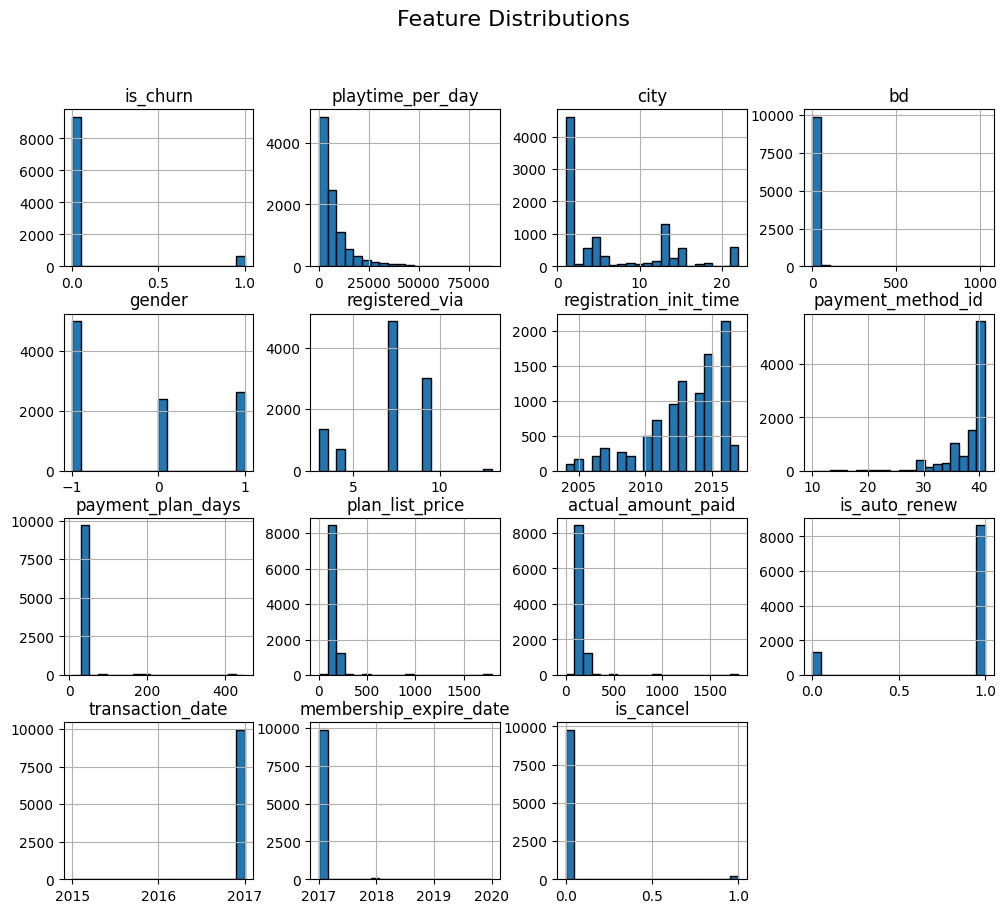

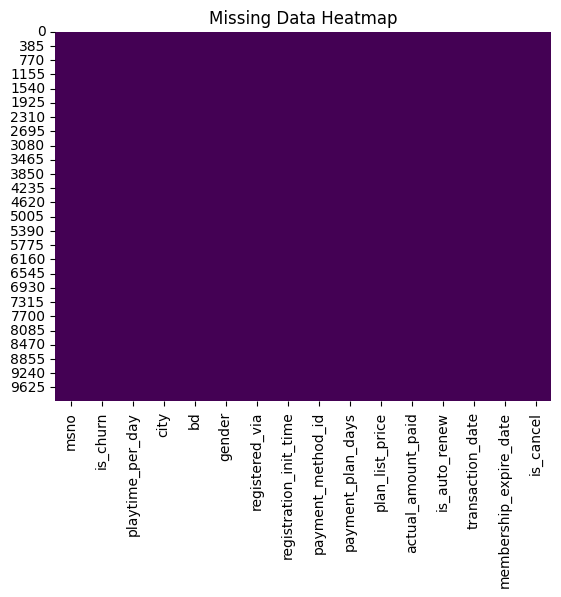

C:\Users\User\AppData\Local\Temp\ipykernel_9820\2453294960.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_churn", data=df, palette="coolwarm")


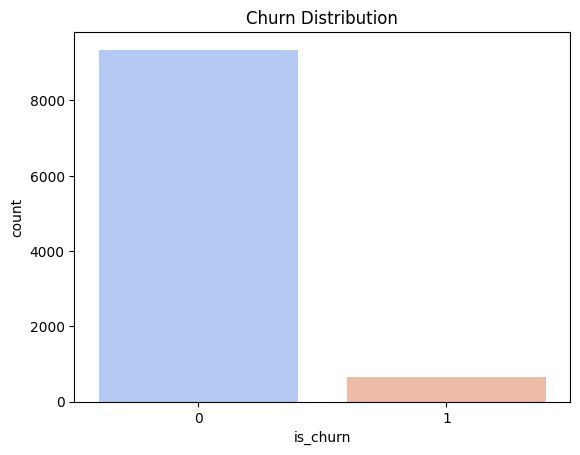

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#feature distributions
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

#heatmap for null values
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

#churn distribution
sns.countplot(x="is_churn", data=df, palette="coolwarm")
plt.title("Churn Distribution")
plt.show()



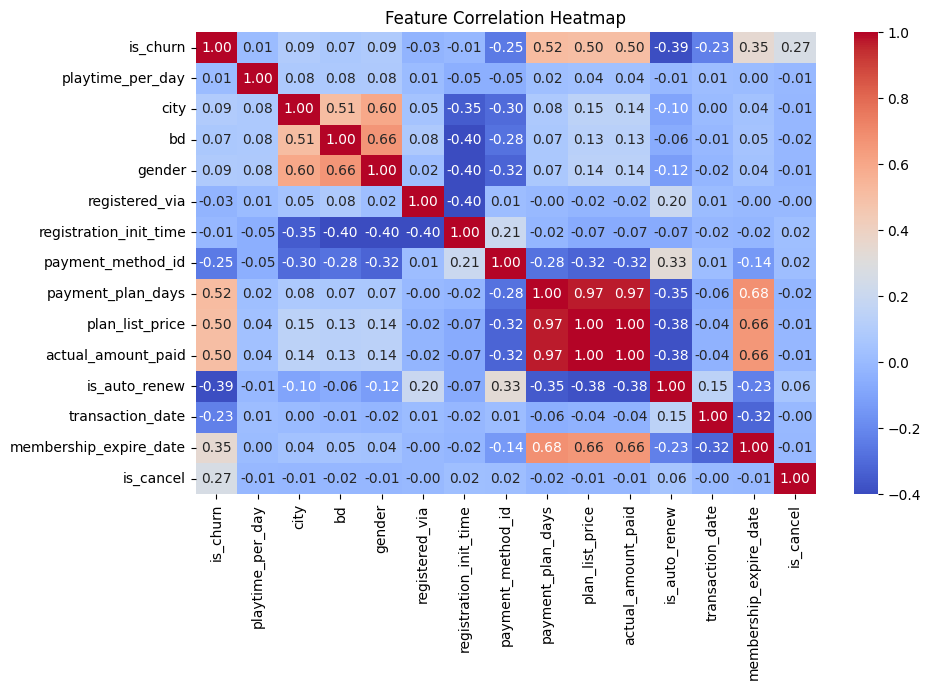

In [6]:
df_numeric = df.select_dtypes(["number"])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Manual Data quality Checks

In [7]:
print("Key Insights:")
print(f"Total samples: {len(df)}")
print(f"Missing values per column:\n{df.isnull().sum()}")
print(f"Correlation with Churn:\n{df_numeric.corr()['is_churn'].sort_values(ascending=False)}")

Key Insights:
Total samples: 10000
Missing values per column:
msno                      0
is_churn                  0
playtime_per_day          0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64
Correlation with Churn:
is_churn                  1.000000
payment_plan_days         0.518362
plan_list_price           0.504642
actual_amount_paid        0.503543
membership_expire_date    0.346763
is_cancel                 0.265752
city                      0.092757
gender                    0.090589
bd                        0.070736
playtime_per_day          0.005318
registration_init_time   -0.011419
registered_via           -0.032417
transaction_date         -0.22596

Quality Check with Great Expectations (gx)

In [ ]:
import great_expectations as gx
import pprint
import json

context = gx.get_context()
assert type(context).__name__ == "EphemeralDataContext"

#create datasource
data_source = context.data_sources.add_pandas(name= "kaggle_churn_dataset")
data_asset = data_source.add_dataframe_asset(name="kaggle_churn_asset")

#create batch
batch_definition_name = "kaggle_churn_batch"
batch_definition = data_asset.add_batch_definition_whole_dataframe(batch_definition_name)
assert batch_definition.name == batch_definition_name

batch_parameters = {"dataframe": df}
batch = batch_definition.get_batch(batch_parameters= batch_parameters)

#create suite
expectation_suite_name = "kaggle_churn_suite"
suite = gx.ExpectationSuite(name=expectation_suite_name)
#add expectations
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToNotBeNull(column="is_churn")
)

suite.add_expectation(
    gx.expectations.ExpectColumnDistinctValuesToBeInSet(
        column="is_churn", 
        value_set = [0,1]
    )
)

suite.add_expectation(
    gx.expectations.ExpectColumnDistinctValuesToBeInSet(
        column="gender", 
        value_set = [-1,0,1]
    )
)

suite.add_expectation(
    gx.expectations.ExpectColumnDistinctValuesToBeInSet(
        column="is_auto_renew", 
        value_set = [0,1]
    )
)

suite.add_expectation(
    gx.expectations.ExpectColumnValuesToBeInSet(
        column="is_cancel",
        value_set=[0, 1]
    )
)

suite.add_expectation(
    gx.expectations.ExpectColumnValuesToBeBetween(
        column="bd",
        min_value= 13, 
        max_value= 100
    )
)

context.suites.add(suite)

#add validator
validator = context.get_validator(
    batch_list=[batch],
    expectation_suite_name=expectation_suite_name
)

#call validator
validator_results = validator.validate()

full_json = json.dumps(validator_results.to_json_dict(), indent = 2)
print("VALIDATOR RESULTS ------------------------------------------------------------------------------")
for idx, result in enumerate(validator_results.results):
    print(f"=== Expectation Result #{idx + 1} ===")
    pprint.pprint(result)
    print()

Calculating Metrics:   0%|          | 0/22 [00:00<?, ?it/s]

VALIDATOR RESULTS ------------------------------------------------------------------------------
=== Expectation Result #1 ===
{
  "success": true,
  "expectation_config": {
    "type": "expect_column_values_to_not_be_null",
    "kwargs": {
      "batch_id": "kaggle_churn_dataset-kaggle_churn_asset",
      "column": "is_churn"
    },
    "meta": {},
    "id": "7158c1c8-6a0a-40f4-b941-acdc179de632"
  },
  "result": {
    "element_count": 10000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

=== Expectation Result #2 ===
{
  "success": true,
  "expectation_config": {
    "type": "expect_column_distinct_values_to_be_in_set",
    "kwargs": {
      "batch_id": "kaggle_churn_dataset-kaggle_churn_asset",
      "column": "is_churn",
      "value_set": [
        0,
        1
      ]
    },
    "meta": {},
    "